In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', 500)

**Column Description:**

Column Name		-	Description
* country				: Name of the country
* child_mort		: Death of children under 5 years of age per 1000 live births
* exports				: Exports of goods and services. Given as %age of the Total GDP
* health				: Total health spending as %age of Total GDP
* imports				: Imports of goods and services. Given as %age of the Total GDP
* Income				: Net income per person
* Inflation			: The measurement of the annual growth rate of the Total GDP
* life_expec		: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer			: The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp				: The GDP per capita. Calculated as the Total GDP divided by the total population.

# Data Preparation

In [0]:
df_country = pd.read_csv('/content/drive/My Drive/InputFiles/AssignmentClustering/Country-data.csv')

In [6]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
list(df_country.country)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita

### Checking for the duplicates and repeated country names, by any chance

In [8]:
df_country.loc[df_country.duplicated()]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [9]:
# Why two countries: starting with -- Congo
df_country.loc[df_country.country.str.startswith('Congo')]

## Following output clearly shows these two are different countries with different starts.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740


### Checking Datatypes and Null Values

In [10]:
# Checking datatype and null values
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
# No, of NULL values
df_country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Checking for Outliers


In [13]:
df_country.describe(percentiles= [.25, .50, .75, .85, .9, .95, .97, .98, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
85%,88.310000,65.330000,9.631000,64.520000,36200.000000,15.330000,79.910000,5.023000,31090.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


From the above data observations:
* 'inflation', 'gdpp', 'income' has a sudden spike at 99% and most of the features are gradually increasing too.

In [14]:
# Checking number of 'inflation' entries above 98%
df_country.loc[df_country['inflation'] >= df_country['inflation'].quantile(.98)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500


In [15]:
# Checking number of 'income' entries above 98%
df_country.loc[df_country['income'] >= df_country['income'].quantile(.98)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [16]:
# Checking number of 'gdpp' entries above 98%
df_country.loc[df_country['gdpp'] >= df_country['gdpp'].quantile(.98)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


Text(0.5, 1.0, 'INFLATION distribution')

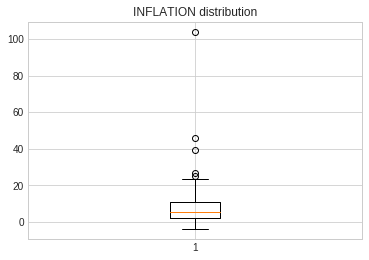

In [17]:
# plotting box plots for suspecting outliers
plt.style.use('seaborn-whitegrid')
plt.boxplot(df_country['inflation'])
plt.title('INFLATION distribution')

Text(0.5, 1.0, 'INCOME distribution')

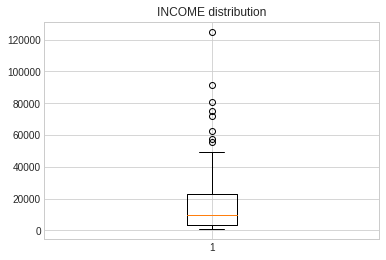

In [18]:
plt.style.use('seaborn-whitegrid')
plt.boxplot(df_country['income'])
plt.title('INCOME distribution')

Text(0.5, 1.0, 'GDPP distribution')

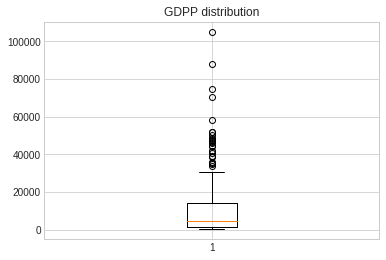

In [19]:
plt.style.use('seaborn-whitegrid')
plt.boxplot(df_country['gdpp'])
plt.title('GDPP distribution')

# Rescalling

In [0]:
df_countryList  = df_country.pop('country')

In [21]:
df_country_stats = df_country
df_country_stats.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [0]:
# instantiating scaler
scaler = StandardScaler()

# fiting and transforming --  df_country_stats
conuntry_stats_scaled = scaler.fit_transform(df_country_stats)

In [24]:
conuntry_stats_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
conuntry_stats_scaled.shape

(167, 9)

## Hopkins Statistics Analysis - without PCA

In [0]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [0]:
df_country_stats_scaled = pd.DataFrame(conuntry_stats_scaled)
df_country_stats_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [28]:
hopkins(df_country_stats_scaled)

0.8813602124149554

In [29]:
hopkins(df_country_stats_scaled)

0.8555378611947979

In [30]:
hopkins(df_country_stats_scaled)

0.8328094287346075

In [31]:
hopkins(df_country_stats_scaled)

0.819522860293731

In [32]:
hopkins(df_country_stats_scaled)

0.8911580395651942

In [33]:
hopkins(df_country_stats_scaled)

0.8615119935462419

In overall, hopkins statistics ranging from 82% to 89%.
Considering good scope of clustering can happen

# Applying PCA Methodologies

In [0]:
from sklearn.decomposition import PCA

In [0]:
# Choosing Random state as 85 for consistent results
pca = PCA(random_state= 85)

In [36]:
""" 
Fiting the scaled dataset to check the SSD and variance ratio
And to finalize Optimum No, of vectors explaining maximum variance of data values too.

"""

pca.fit(df_country_stats_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=85,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# Listing PCA Components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [38]:
# Checking the explained variance ratio
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

### Scree Plot - detailing Explained Variance Ratio

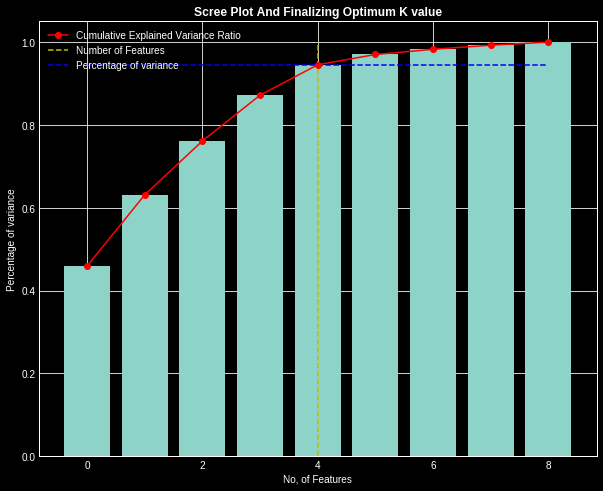

In [39]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-o', label = 'Cumulative Explained Variance Ratio' )
plt.bar(range(0, len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x = 4, ymax = 1, colors = 'y', label = 'Number of Features', linestyles='--', ymin= 0)
plt.hlines(y = 0.945, xmin = 0, xmax = 8, label = 'Percentage of variance', linestyles= '--', colors= 'b')
plt.xlabel('No, of Features')
plt.ylabel("Percentage of variance")
plt.title('Scree Plot And Finalizing Optimum K value', fontweight='bold')
plt.legend()

As per above plot:
1. Mainly 5 Features are enough to explain the 94.5 percentage of variance in data.
2. So, selecting 5 features to assess the clustering methodologies.

## Performing PCA with 5 Features

In [0]:
from sklearn.decomposition import IncrementalPCA

In [0]:
# Using number of components as 5
pca_final = IncrementalPCA(n_components= 5)

In [0]:
""" 
Performing Principal Component Analysis
----------------------------------------
Meaning:
1. Finding Eighen Values and Eighen Vectors for major 5 variance features
2. Finding new components innew Eighen vectors domain
"""

df_final_PCA = pca_final.fit_transform(df_country_stats_scaled)

In [43]:
# Expecting 5 Features to explain the total dataset
df_final_PCA.shape

(167, 5)

In [44]:
# Finding Correlation Coefficient matrix
# Checking for the Multicollinearity between the features.

corr_matrix = np.corrcoef(df_final_PCA.transpose())
corr_matrix.shape

(5, 5)

### Explaining **NO** multicollinearity in between the NEW vectors

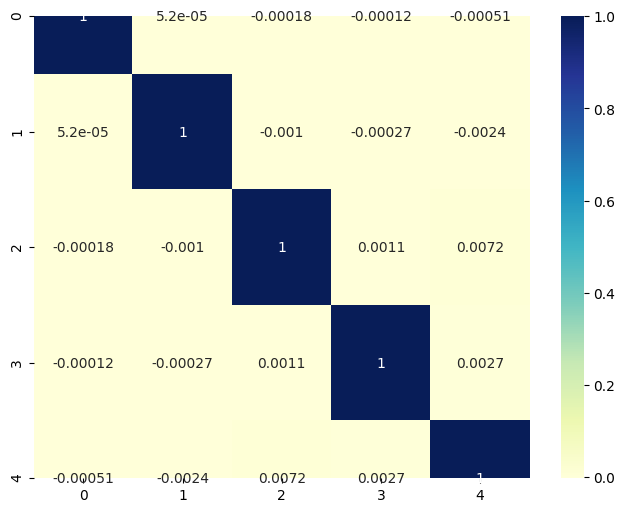

In [45]:
plt.style.use('default')
plt.figure(figsize= (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')

In [0]:
# Changing NEW vectors to dataframe for readability
df_final_PCA_ACT = pd.DataFrame(df_final_PCA, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [47]:
df_final_PCA_ACT.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [48]:
df_final_PCA_ACT.shape

(167, 5)

### Finding Hopkins Rating for PCAed vector data

In [49]:
# Hopkins value for PCAed data
hopkins(df_final_PCA_ACT)

0.8524608307654054

In [50]:
hopkins(df_final_PCA_ACT)

0.8316251297865317

In [51]:
hopkins(df_final_PCA_ACT)

0.8221110772996487

In [52]:
hopkins(df_final_PCA_ACT)

0.7913145489027559

In [53]:
hopkins(df_final_PCA_ACT)

0.8369627243597544

**Post PCAed data vectors:**

In a broader terms, Hopkins rating ranging in between 77% to 87%, still considered to be good probability of having clusters.

# Using "**KMeans Clustering**" to find the groupings of countries.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
# Finding Optimal number of clusters
ssd = list()
silhouteScore = list()
for num_cluster in range(2, 9):
  kmeans = KMeans(n_clusters= num_cluster, max_iter= 100)
  kmeans.fit(df_final_PCA_ACT)
  
  # Finding sum of squared Distance
  ssd.append(kmeans.inertia_)

  # Cluster Labels
  cluster_lables = kmeans.labels_

  # finding Silhoutte Score
  silhouteValue = silhouette_score(df_final_PCA_ACT, cluster_lables)
  print("For {} number of Clusters: SSD ==> {},\tSilhouteScore is ==> {}".format(num_cluster, round(kmeans.inertia_, 3), round(silhouteValue, 3)))
  silhouteScore.append(silhouteValue)

For 2 number of Clusters: SSD ==> 968.181,	SilhouteScore is ==> 0.304
For 3 number of Clusters: SSD ==> 749.367,	SilhouteScore is ==> 0.308
For 4 number of Clusters: SSD ==> 618.639,	SilhouteScore is ==> 0.327
For 5 number of Clusters: SSD ==> 539.938,	SilhouteScore is ==> 0.326
For 6 number of Clusters: SSD ==> 470.467,	SilhouteScore is ==> 0.262
For 7 number of Clusters: SSD ==> 420.754,	SilhouteScore is ==> 0.275
For 8 number of Clusters: SSD ==> 381.006,	SilhouteScore is ==> 0.27


## ELBOW curve - Explaining Sum Of Squared Distances

Text(0.5, 1.0, 'ELBOW curve - Sum of Squared Distances vs Silhoutte Score')

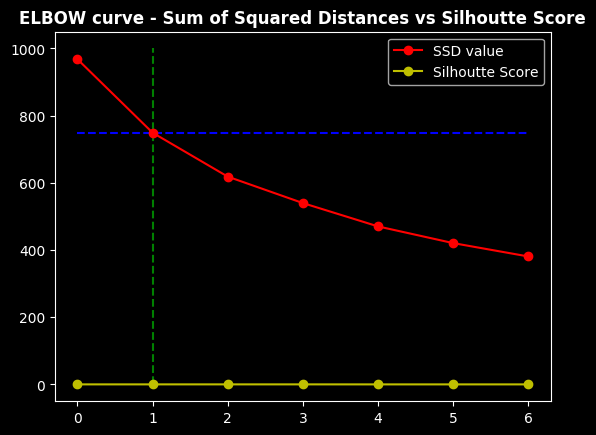

In [56]:
# plt.figure(figsize = (8, 6))
plt.style.use('dark_background')
plt.plot(ssd, 'r-o', label = 'SSD value')
plt.plot(silhouteScore, 'y-o', label = 'Silhoutte Score')
plt.vlines(x = 1,  ymin= 0, ymax = 1000, colors = 'g', linestyles='--')
plt.hlines(y = 749.367, xmin = 0, xmax = 6, linestyles= '--', colors= 'b')

plt.legend()
plt.title('ELBOW curve - Sum of Squared Distances vs Silhoutte Score', fontweight='bold')

Looking at the above observations:

* SSD maitained steady slope of droppings
* but, for number of cluster = 3, SSD follows further steady path
* Considering final number of clusters are 3 for further analysis.

## Performing Clustering Operations with a **confirmation** of 3 clusters

In [57]:
# Performing KMeans clustering with Optimal 3 number of clusters
kmeans = KMeans(n_clusters= 3 , max_iter= 100, random_state = 85)
kmeans.fit(df_final_PCA_ACT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=85, tol=0.0001, verbose=0)

In [58]:
# Clustering lables spit by kmeans algorithm for different countries
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [59]:
# Appending PCA produced clustering with Countries Dataframe
df_country_stats['cluster_id_PCA_and_KMeans'] = kmeans.labels_
df_final_PCA_ACT['cluster_id_PCA_and_KMeans'] = kmeans.labels_

# Final Countries Dataframe
df_country_stats.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_PCA_and_KMeans
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


# Using "Hierarchical Clustering" over PCAed Data

## Using Single Linkage Method:

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

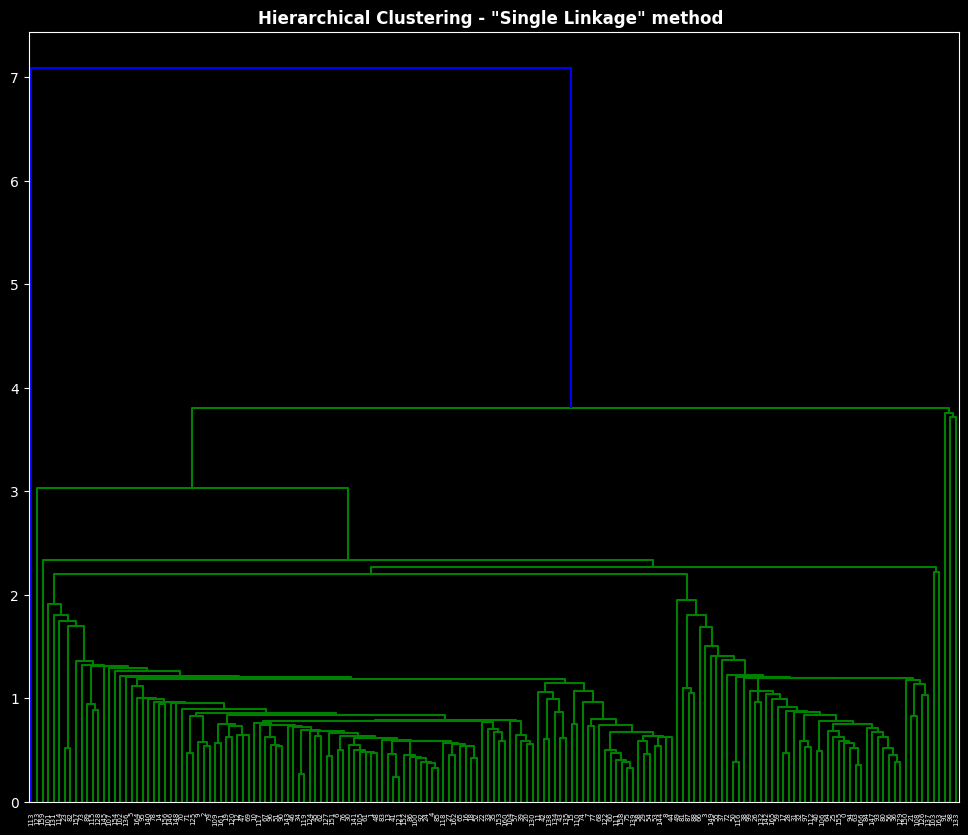

In [61]:
# Using 'Single Linkage' method
plt.style.use('dark_background')

plt.figure(figsize= (12, 10))
mergings = linkage(df_final_PCA_ACT, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.title('Hierarchical Clustering - "Single Linkage" method ', fontweight='bold')
plt.show()

## Using 'Complete Linkage' Method:

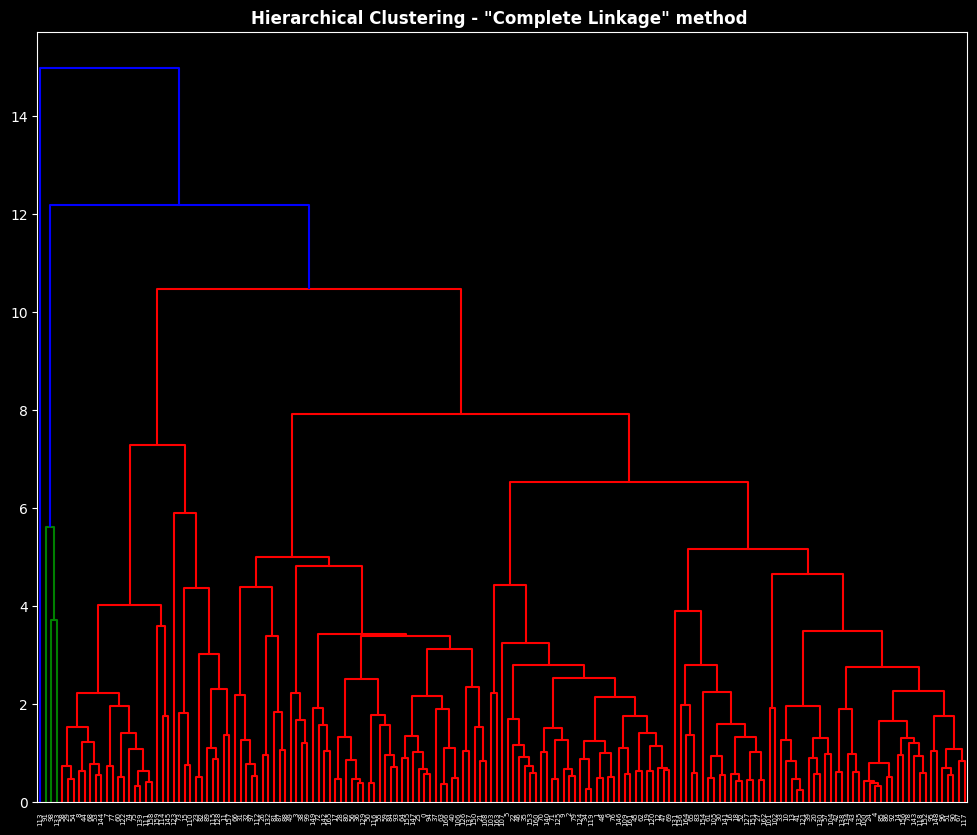

In [62]:
# Using 'Complete' method
plt.style.use('dark_background')
plt.figure(figsize= (12, 10))
mergings = linkage(df_final_PCA_ACT, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.title('Hierarchical Clustering - "Complete Linkage" method ', fontweight='bold')

plt.show()

**NOTE:**

With above plotting and confirming 3 clusters would be optimal for the operations

In [63]:
# Cutting the dendrogram to have 3 clusters
cluster_lables = cut_tree(mergings, n_clusters= 3).reshape(-1, )
cluster_lables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
df_country_stats['cluster_id_PCA_and_Hierarchical'] = cluster_lables
df_final_PCA_ACT['cluster_id_PCA_and_Hierarchical'] = cluster_lables

df_country_stats.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_PCA_and_KMeans,cluster_id_PCA_and_Hierarchical
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


In [65]:
df_final_PCA_ACT.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_PCA_and_KMeans,cluster_id_PCA_and_Hierarchical
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,0,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2,0


# Checking the Clustering Behaviour - On **PCAed Data set**

## Showing Clustering behavior using First two Major Principle Components

Text(0.5, 1.0, 'PC1 vs PC2 explained using Hierarchical Clustering')

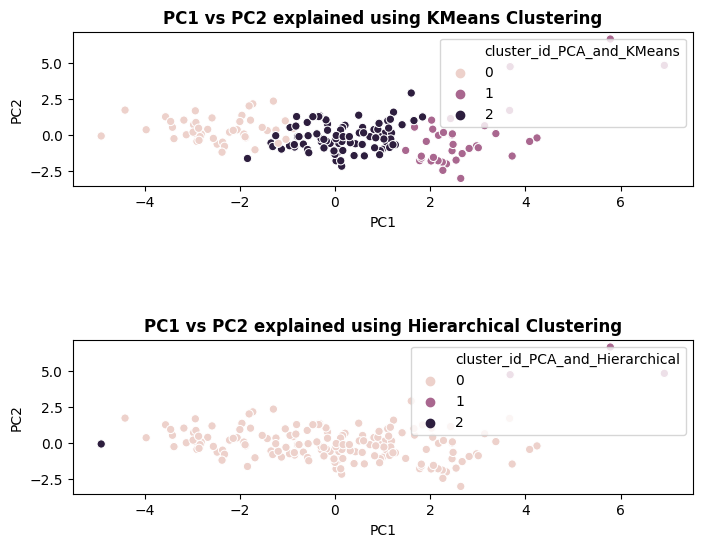

In [66]:
# Also checking countries clustering behaviour using Scatter Plot.
plt.style.use('default')
plt.figure(figsize= (8,6))
plt.subplots_adjust(hspace= 1)

plt.subplot(211)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster_id_PCA_and_KMeans', data = df_final_PCA_ACT)
plt.title('PC1 vs PC2 explained using KMeans Clustering', fontweight='bold')

plt.subplot(212)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster_id_PCA_and_Hierarchical', data = df_final_PCA_ACT)
plt.title('PC1 vs PC2 explained using Hierarchical Clustering', fontweight='bold')

In [67]:
df_final_PCA_ACT.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_PCA_and_KMeans,cluster_id_PCA_and_Hierarchical
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,0,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2,0


### PCAed vectored data **Clustering Profile** using KMeans methodology

In [0]:
df_PCAed_cluster_profile = pd.DataFrame()

In [0]:
df_PCAed_cluster_profile['PC1'] = df_final_PCA_ACT.groupby(by = 'cluster_id_PCA_and_KMeans')['PC1'].mean()
df_PCAed_cluster_profile['PC2'] = df_final_PCA_ACT.groupby(by = 'cluster_id_PCA_and_KMeans')['PC2'].mean()
df_PCAed_cluster_profile['PC3'] = df_final_PCA_ACT.groupby(by = 'cluster_id_PCA_and_KMeans')['PC3'].mean()
df_PCAed_cluster_profile['PC4'] = df_final_PCA_ACT.groupby(by = 'cluster_id_PCA_and_KMeans')['PC4'].mean()
df_PCAed_cluster_profile['PC5'] = df_final_PCA_ACT.groupby(by = 'cluster_id_PCA_and_KMeans')['PC5'].mean()


In [70]:
df_PCAed_cluster_profile.head()

,PC1,PC2,PC3,PC4,PC5
cluster_id_PCA_and_KMeans,,,,,
0,-2.434654,0.410627,-0.099614,0.692214,-0.135141
1,2.769799,-0.212660,0.065634,0.868601,-0.170155
2,0.175190,-0.138616,0.027608,-0.759568,0.148538


### Clustering Profile verification on Original Data set:

In [0]:
df_orig_cluster_profile = pd.DataFrame()

In [0]:
df_orig_cluster_profile['gdpp']       = df_country_stats.groupby(by = 'cluster_id_PCA_and_KMeans').gdpp.mean()
df_orig_cluster_profile['child_mort'] = df_country_stats.groupby(by = 'cluster_id_PCA_and_KMeans').child_mort.mean()
df_orig_cluster_profile['income']     = df_country_stats.groupby(by = 'cluster_id_PCA_and_KMeans').income.mean()


In [73]:
# Original Data - Clustering Profile definition
round(df_orig_cluster_profile, 2)

,gdpp,child_mort,income
cluster_id_PCA_and_KMeans,,,
0,1922.38,92.96,3942.40
1,42494.44,5.00,45672.22
2,6486.45,21.93,12305.60


**From the above Cluster Profile over Original Data**:
1. Cluster 0, clearly confirming lowest GDPP and INCOME mean values, so does explainng the highest Child_mortality rate.
  * This turns out to be, "POORELY DEVELOPING COUNTRIES", which needs to have help
2. Clustert 1, seems to have very high GDPP and INCOME values, so we are having very less Child_mortality rate.
  * This should be reflecting 'Developed Countries"
3. Cluster 2, seems to have moderate GDPP and Income in terms of mean; so, moderately maintaining child_mortality.
  * This could be defined as 'Developing Country'


# Checking the Clustering Behaviour - On **Original Data set**

## Comparing KMeans Vs Hierarchical Methodologies

Text(0.5, 1.0, 'INCOME Grouped Analysis - Hierarchical')

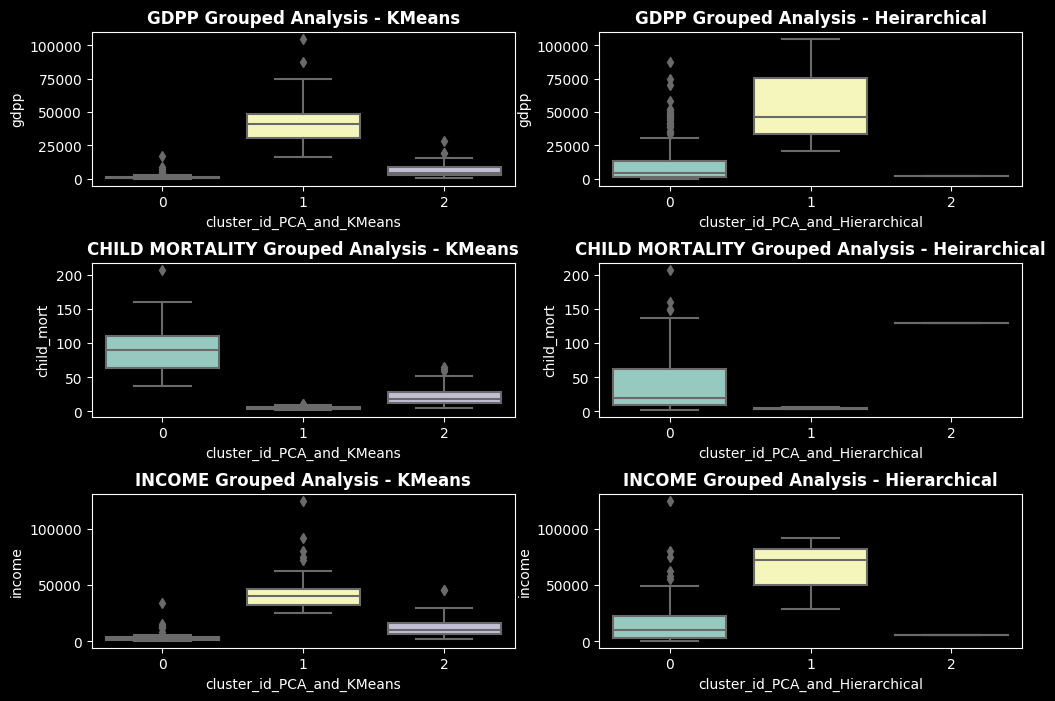

In [74]:
plt.style.use('dark_background')
plt.figure(figsize= (12, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(321)
sns.boxplot(x = 'cluster_id_PCA_and_KMeans', y = 'gdpp', data = df_country_stats)
plt.title('GDPP Grouped Analysis - KMeans', fontweight='bold')

plt.subplot(322)
sns.boxplot(x = 'cluster_id_PCA_and_Hierarchical', y = 'gdpp', data = df_country_stats)
plt.title('GDPP Grouped Analysis - Heirarchical', fontweight='bold')

plt.subplot(323)
sns.boxplot(x = 'cluster_id_PCA_and_KMeans', y = 'child_mort', data = df_country_stats)
plt.title('CHILD MORTALITY Grouped Analysis - KMeans', fontweight='bold')

plt.subplot(324)
sns.boxplot(x = 'cluster_id_PCA_and_Hierarchical', y = 'child_mort', data = df_country_stats)
plt.title('CHILD MORTALITY Grouped Analysis - Heirarchical', fontweight='bold')

plt.subplot(325)
sns.boxplot(x = 'cluster_id_PCA_and_KMeans', y = 'income', data = df_country_stats)
plt.title('INCOME Grouped Analysis - KMeans', fontweight='bold')

plt.subplot(326)
sns.boxplot(x = 'cluster_id_PCA_and_Hierarchical', y = 'income', data = df_country_stats)
plt.title('INCOME Grouped Analysis - Hierarchical', fontweight='bold')

Text(0.5, 1.0, 'Child Mort Vs Income using "Hierarchical over PCAed" Data')

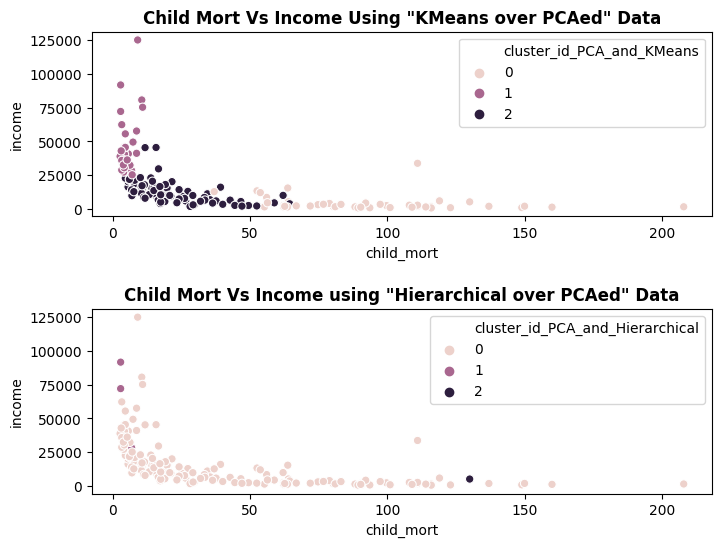

In [75]:
# Also checking countries clustering behaviour using Scatter Plot.
plt.style.use('default')
plt.figure(figsize= (8,6))
plt.subplots_adjust(hspace= 0.5)

plt.subplot(211)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id_PCA_and_KMeans', data = df_country_stats)
plt.title('Child Mort Vs Income Using "KMeans over PCAed" Data', fontweight='bold')

plt.subplot(212)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id_PCA_and_Hierarchical', data = df_country_stats)
plt.title('Child Mort Vs Income using "Hierarchical over PCAed" Data', fontweight='bold')


Text(0.5, 1.0, 'Child Mort Vs GDPP Using "Hierarchical over PCAed" Data')

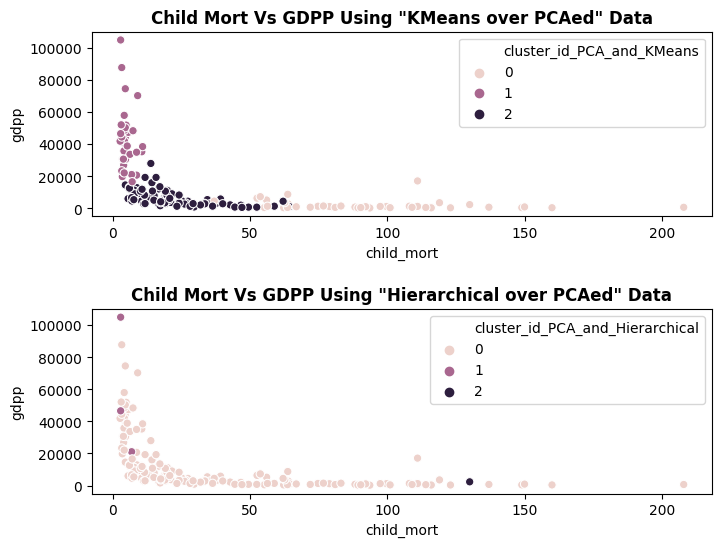

In [76]:
# Also checking countries clustering behaviour using Scatter Plot.
plt.style.use('default')
plt.figure(figsize= (8,6))
plt.subplots_adjust(hspace= 0.5)

plt.subplot(211)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id_PCA_and_KMeans', data = df_country_stats)
plt.title('Child Mort Vs GDPP Using "KMeans over PCAed" Data', fontweight='bold')

plt.subplot(212)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id_PCA_and_Hierarchical', data = df_country_stats)
plt.title('Child Mort Vs GDPP Using "Hierarchical over PCAed" Data', fontweight='bold')

**Looking at the KMeans Clustering:**
1. *Cluster 0*: 
	* Having GDPP median at almost close to Zero and so does the income, we have very high Child Mortality rate with a median at around close to 100.
	* Thus these countries, falls under "**POOR DEVELOPING COUNTRIES**" ==> **which definitely in dire need of HELP**

2. *Cluster 1*: 
	* having a median of GDPP at around 4500 and Income median at around close to 50000, we are having Child_mortality very minimum compared to rest of the countries with median almost close to Zero.
	* Thus these countries, signifying "**DEVELOPED COUNTRIES**"
3. *Cluster 2*: 
	* These countries are consistently, maintaing average median values of GDPP and INCOME, so does having average median of CHILD_MORTALITY rate too.
	* So, safe to consider this as '**DEVELOPING COUNTRIES**'



**Looking at the Heirarchical Clustering:**
1. Cluster 1, with almost very high values of GDPP (inter-quartiles ranging from 30,000 to 75000) and income (50,000 to 75, 000), Child_mortality is almost zero ===> this again signifies Developed countries
2. Cluster 0, GPDD showing 75% of growth at around less than 15,000 and Income around 500 to 2000, we are having very high Child-mortality, ranging inter-quartiles at 5 to 60 people ==> This is signifying underdeveloped (poor) countries
3. SImilarly, Cluster 2, having minimum of all GDPP with mean at almost zero and mean Income again at just above zero, we are having very very high Child_mortality with a mean of 150, but, range of inter-quartiles are almost zero.

## For further conclusions using, KMeans Clusterning output:

### As per the definitions of KMeans clustering; **Developed Countries** having **Cluster_id = 1**

In [0]:
pd.options.display.max_rows = 999

In [0]:
# Appending Popped Out Country back to DF
df_country_stats['Country'] = df_countryList

In [86]:
# Getting the list of Developing Countries - From KMeans
print("""
List Of Poorly Developing Countries:
==================================== """)
df_country_stats.loc[df_country_stats.cluster_id_PCA_and_KMeans == 0]['Country']


List Of Poorly Developing Countries:


0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [80]:
print("""
List Of Developed Countries:
================================== """)
df_country_stats.loc[df_country_stats.cluster_id_PCA_and_KMeans == 1]['Country']


List Of Developed Countries:


7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [84]:
print("""
List Of Developing Countries:
=============================""")
df_country_stats.loc[df_country_stats.cluster_id_PCA_and_KMeans == 2]['Country']


List Of Developing Countries:


1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48          

# CONCLUSION

As mentioned above, Cluster 0 countries does need of dire HELP from other countries to sustain the human life and especially CHILD lives.

**And the list of countries, needs direst help are:**

In [85]:
df_country_stats.loc[df_country_stats.cluster_id_PCA_and_KMeans == 0].sort_values(by = ['income', 'gdpp'])['Country'].head()

37             Congo, Dem. Rep.
88                      Liberia
26                      Burundi
112                       Niger
31     Central African Republic
Name: Country, dtype: object

### **Above list of Top - 5 countries selected on the basis of 'INCOME' and "GDPP", as:**
1. Most of the countries with high Child_mortality are due to the less income and top-3 most child nuturishment observed in above 5 list of countries.
2. Less GDPP can definitely impacting the life expectancy, style of human life in that country.